## Softmax and cross entropy

Softmax defined as

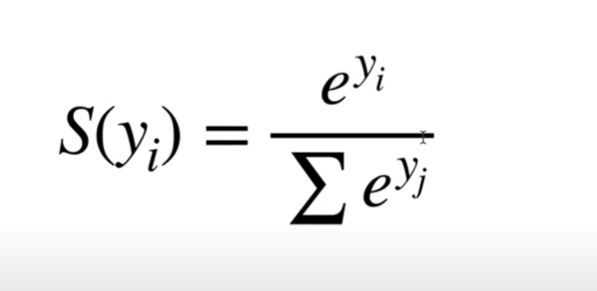

In [1]:
## numpy implementation

import numpy as np

In [2]:
def softmax(x): ## x is a vector
    return (np.exp(x))/(np.sum(np.exp(x)))

In [3]:
x = np.array([2.0, 1.0, 0.1])

In [4]:
softmax(x)

array([0.65900114, 0.24243297, 0.09856589])

In [5]:
print("softmax numpy", softmax(x))

softmax numpy [0.65900114 0.24243297 0.09856589]


In [7]:
## pytorch implementation

import torch
x = torch.tensor(x)

In [13]:
outputs = torch.softmax(x, dim = 0) ## dim 0 means along row axis
print("softmax torch", outputs)

softmax torch tensor([0.6590, 0.2424, 0.0986], dtype=torch.float64)


## Cross Entropy

the actual y's are one-hot and predicted are probabilities (output of softmax)

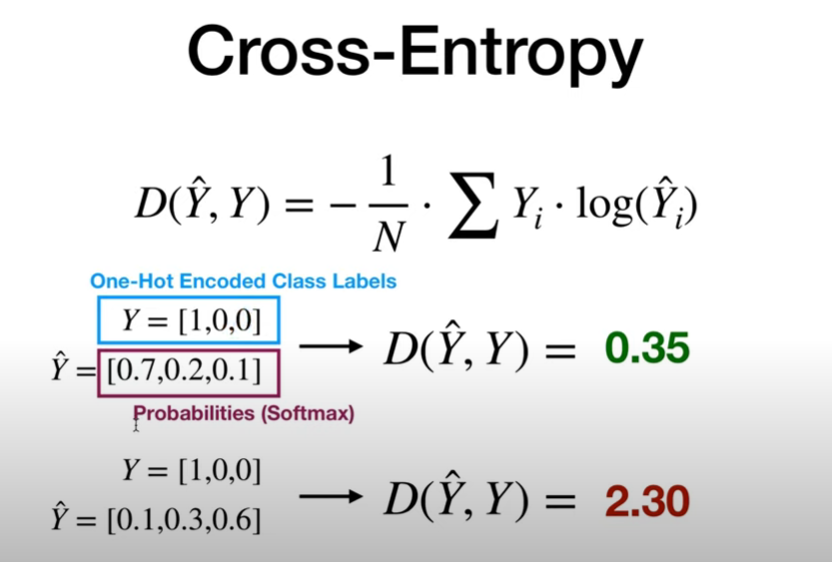

In [15]:
## numpy implementation

def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted)) ## note we just return the sum, not the ave
    return loss
    

In [16]:
Y = np.array([1,0,0])

In [17]:
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

In [19]:
cross_entropy(Y, Y_pred_good)

0.35667494393873245

In [20]:
cross_entropy(Y, Y_pred_bad)

2.3025850929940455

In [21]:
## pytorch implementation
import torch.nn as nn



## use nn.CrossEntropyLoss

CAREFUL !! nn.CrossEntropyLoss implements softmax followed by CE internally
Therefore
1) y_pred should be raw logits, not probabilities after implementing softmax
2) y_labels don't need to be 1 hot encoded, give raw label

In [22]:
Y = torch.tensor([0]) ## correct class label of 0, not 1 hot encoded. 
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) ## Has size nsamples*n_classes
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

In [23]:
loss = nn.CrossEntropyLoss() ## note the order, predicted first, then acatual

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

In [24]:
l1

tensor(0.4170)

In [26]:
l2

tensor(1.8406)

In [27]:
## to get actual predictions (label with best value)

In [33]:
_, predictions1  = torch.max(Y_pred_good, dim=1) ## first value, then index of value
_, predictions2  = torch.max(Y_pred_bad, dim=1)

In [30]:
predictions2

tensor([0])

In [32]:
torch.max(Y_pred_good, dim=1)

torch.return_types.max(
values=tensor([2.]),
indices=tensor([0]))

In [34]:
## extend to multiple samples

In [35]:
Y = torch.tensor([2, 0, 1]) ## correct class label of 0, not 1 hot encoded. 
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) ## Has size nsamples*n_classes - 3*3
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[0.1, 1.0, 2.1], [0.1, 3.0, 0.1]]) ## Has size nsamples*n_classes - 3*3


In [36]:

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

In [37]:
l1

tensor(0.3018)

In [38]:
l2

tensor(1.6242)

In [39]:
_, predictions1  = torch.max(Y_pred_good, dim=1) ## first value, then index of value
_, predictions2  = torch.max(Y_pred_bad, dim=1)

In [40]:
predictions1

tensor([2, 0, 1])

In [41]:
predictions2

tensor([0, 2, 1])

## Example of softentropy for a model with output no of classes - num_classes
use loss of CrossEntropyLoss

In [44]:
## classification problem with output no of classes = num_classes
class NeuralNet2(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(x)
        out = self.linear2(x) ## note : at this stage,  you don't normalize with soft entropy    
        return out

In [ ]:
criterion = nn.CrossEntropyLoss() ## applies softmax internally as discussed

## Binary classification model, so output is only one logit
## use BCELoss instead of CrossEntropyLoss


In [46]:
class NeuralNet2(nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        ## self.linear2 = nn.Linear(hidden_size, num_classes)
        self.linear2 = nn.Linear(hidden_size, 1) ## 1 because only 1 output for BCE
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(x)
        out = self.linear2(x) 
        ## note : at this stage, for BCE unlike CE, you have to normalize first to probability
        y_pred = torch.sigmoid(x)
        return out

In [ ]:
criterion = nn.BCELoss()